## EXPLORATORY DATA ANALYSIS

In [1]:
#Installing and importing the dependency
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 KB 644.4 kB/s eta 0:00:00


In [2]:
!pip show timm

Name: timm
Version: 0.5.4
Summary: (Unofficial) PyTorch Image Models
Home-page: https://github.com/rwightman/pytorch-image-models
Author: Ross Wightman
Author-email: hello@rwightman.com
License: UNKNOWN
Location: /opt/conda/lib/python3.7/site-packages
Requires: torch, torchvision
Required-by: 


You may come across the question why i am installing timm in image classification problem i am going use efficientnet so i am installing that.

In [3]:
import timm

In [4]:
from fastai.vision.all import *

In [5]:
train_df = pd.read_csv("../input/paddy-disease-classification/train.csv")
train_df.sample(5)

,image_id,label,variety,age
3674,103898.jpg,brown_spot,ADT45,72
9856,100408.jpg,tungro,ADT45,70
5797,108292.jpg,downy_mildew,KarnatakaPonni,50
329,105324.jpg,bacterial_leaf_blight,ADT45,72
4377,106216.jpg,dead_heart,ADT45,70


In [6]:
train_df.variety.value_counts()

ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: variety, dtype: int64

In [7]:
train_df["label"].value_counts()

normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: label, dtype: int64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


In [9]:
train_df.iloc[0]

image_id               100330.jpg
label       bacterial_leaf_blight
variety                     ADT45
age                            45
Name: 0, dtype: object

In [10]:
train_images = get_image_files("../input/paddy-disease-classification/train_images")
train_images

(#10407) [Path('../input/paddy-disease-classification/train_images/tungro/109629.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/104765.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/109706.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/100098.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/102734.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/106433.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/108930.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/102019.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/102416.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/101046.jpg')...]

In [11]:
train_images[0]

Path('../input/paddy-disease-classification/train_images/tungro/109629.jpg')

In [12]:
samp_sub = pd.read_csv("../input/paddy-disease-classification/sample_submission.csv")
samp_sub.sample()

,image_id,label
3443,203444.jpg,NaN


In [13]:
data_dir = Path("../input/paddy-disease-classification")
train_dir = Path("../input/paddy-disease-classification/train_images")
test_dir = Path("../input/paddy-disease-classification/test_images")

In [14]:
data_dir.ls()

(#4) [Path('../input/paddy-disease-classification/sample_submission.csv'),Path('../input/paddy-disease-classification/train_images'),Path('../input/paddy-disease-classification/train.csv'),Path('../input/paddy-disease-classification/test_images')]

In [15]:
(train_dir/"tungro").ls()

(#1088) [Path('../input/paddy-disease-classification/train_images/tungro/109629.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/104765.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/109706.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/100098.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/102734.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/106433.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/108930.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/102019.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/102416.jpg'),Path('../input/paddy-disease-classification/train_images/tungro/101046.jpg')...]

In [16]:
Path.BASE_PATH = train_dir

In [17]:
train_dir.ls()

(#10) [Path('tungro'),Path('hispa'),Path('downy_mildew'),Path('bacterial_leaf_streak'),Path('bacterial_leaf_blight'),Path('brown_spot'),Path('blast'),Path('normal'),Path('dead_heart'),Path('bacterial_panicle_blight')]

In [18]:
(train_dir/"hispa").ls()

(#1594) [Path('hispa/100502.jpg'),Path('hispa/107167.jpg'),Path('hispa/106262.jpg'),Path('hispa/102866.jpg'),Path('hispa/104880.jpg'),Path('hispa/104172.jpg'),Path('hispa/102840.jpg'),Path('hispa/107143.jpg'),Path('hispa/107130.jpg'),Path('hispa/102058.jpg')...]

In [19]:
test_dir.ls()

(#3469) [Path('../input/paddy-disease-classification/test_images/200607.jpg'),Path('../input/paddy-disease-classification/test_images/202733.jpg'),Path('../input/paddy-disease-classification/test_images/200207.jpg'),Path('../input/paddy-disease-classification/test_images/203024.jpg'),Path('../input/paddy-disease-classification/test_images/203056.jpg'),Path('../input/paddy-disease-classification/test_images/202751.jpg'),Path('../input/paddy-disease-classification/test_images/201191.jpg'),Path('../input/paddy-disease-classification/test_images/200912.jpg'),Path('../input/paddy-disease-classification/test_images/200067.jpg'),Path('../input/paddy-disease-classification/test_images/201689.jpg')...]

## DATA PREPARATION

I dont use the train_df for labels because paddy images are put in a folder with name, so i am going to use it.

In [20]:
paddy = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y= parent_label,
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = paddy.dataloaders(train_dir)

Checking our dataloaders are build good aor bad by checking train and valid show batch.

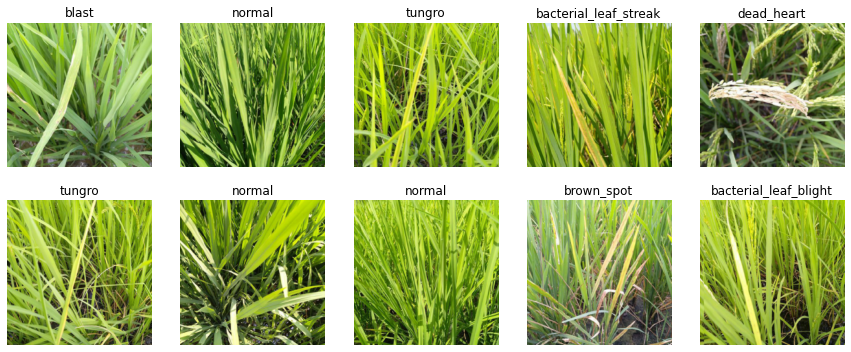

In [21]:
dls.valid.show_batch(max_n=10, nrows=2)

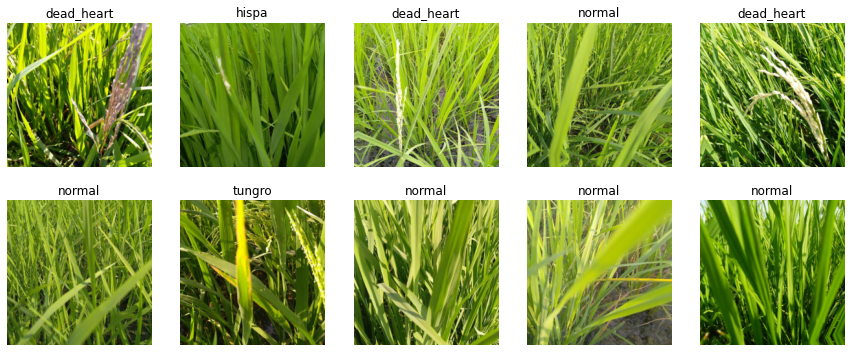

In [22]:
dls.train.show_batch(max_n=10, nrows=2)

In [23]:
paddy.summary(train_dir)

Setting-up type transforms pipelines
Found 10407 items
2 datasets of sizes 8326,2081
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ../input/paddy-disease-classification/train_images/blast/105663.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=480x640
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ../input/paddy-disease-classification/train_images/blast/105663.jpg
    applying parent_label gives
      blast
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(3)

Final sample: (PILImage mode=RGB size=480x640, TensorCategory(3))


Found 10407 items
2 datasets of sizes 8326,2081
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na

I was using the model architecture like efficientnetB0, resnet34, resnet18, sometime using SGD or Adam, Everthing about trying let's try thats my mind says.

In [24]:
learn = vision_learner(dls, "efficientnet_b0", metrics=error_rate, opt_func=Adam)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b0_ra-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_ra-3dd342df.pth


Minimum/10: 1.45e-02, steepest point: 6.31e-03


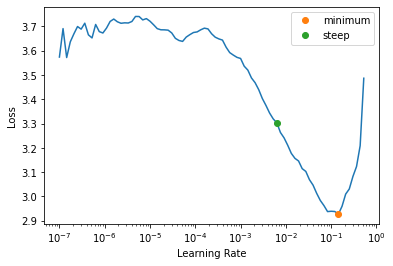

In [25]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [26]:
learn.fine_tune??

In [27]:
learn = vision_learner(dls, "efficientnet_b0", metrics=error_rate, opt_func=Adam)
learn.fit_one_cycle(3, 9.12e-03)
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time
0,1.500534,1.029101,0.331091,02:06
1,0.791428,0.427672,0.142239,01:59
2,0.517293,0.318909,0.101394,01:58


Minimum/10: 6.31e-08, steepest point: 2.51e-05


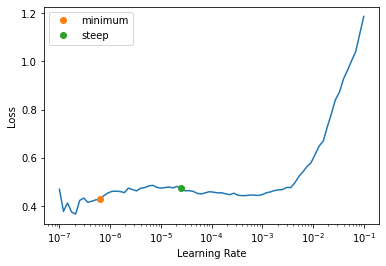

In [28]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [29]:
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.455310,0.317144,0.102355,02:02
1,0.441743,0.305820,0.098510,02:03
2,0.428952,0.300116,0.097549,02:04
3,0.415611,0.292562,0.094666,02:05
4,0.397364,0.285977,0.094185,02:03
5,0.407883,0.282083,0.091783,02:03
6,0.381500,0.274592,0.086497,02:02
7,0.389288,0.273934,0.086977,02:03
8,0.373737,0.274016,0.087938,02:02
9,0.383385,0.268848,0.084575,02:03


In [30]:
learn1 = vision_learner(dls, resnet34, metrics=error_rate)
learn1.fit_one_cycle(3, 3e-3)
learn1.unfreeze()
learn1.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.654723,0.853654,0.288323,01:56
1,0.916154,0.492778,0.172513,01:57
2,0.662022,0.426025,0.141759,01:56


epoch,train_loss,valid_loss,error_rate,time
0,0.599692,0.412054,0.135031,01:59
1,0.563477,0.373098,0.121576,01:59
2,0.506083,0.326185,0.104277,02:00
3,0.448553,0.290423,0.091302,01:58
4,0.394236,0.257551,0.084575,02:00
5,0.350937,0.236492,0.077367,01:59
6,0.318139,0.220891,0.069678,01:59
7,0.295760,0.204868,0.065353,01:58
8,0.282790,0.200631,0.061509,01:59
9,0.247282,0.193882,0.061509,01:59


In [31]:
from fastai.callback.fp16 import *
learn2 = vision_learner(dls, resnet18, metrics=error_rate).to_fp16()
learn2.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.582004,1.453574,0.477174,01:52
1,1.765512,1.035009,0.337338,01:56
2,1.357245,0.825831,0.261413,01:54


epoch,train_loss,valid_loss,error_rate,time
0,0.914141,0.564850,0.191735,01:55
1,0.689852,0.390270,0.128304,01:54
2,0.469061,0.290671,0.094666,01:54
3,0.340690,0.225458,0.072081,01:55
4,0.241783,0.181188,0.057184,01:56
5,0.202008,0.180215,0.060067,01:55


In [32]:
samp_sub.head()

,image_id,label
0,200001.jpg,NaN
1,200002.jpg,NaN
2,200003.jpg,NaN
3,200004.jpg,NaN
4,200005.jpg,NaN


In [33]:
test = test_dir.ls()
test


(#3469) [Path('../input/paddy-disease-classification/test_images/200607.jpg'),Path('../input/paddy-disease-classification/test_images/202733.jpg'),Path('../input/paddy-disease-classification/test_images/200207.jpg'),Path('../input/paddy-disease-classification/test_images/203024.jpg'),Path('../input/paddy-disease-classification/test_images/203056.jpg'),Path('../input/paddy-disease-classification/test_images/202751.jpg'),Path('../input/paddy-disease-classification/test_images/201191.jpg'),Path('../input/paddy-disease-classification/test_images/200912.jpg'),Path('../input/paddy-disease-classification/test_images/200067.jpg'),Path('../input/paddy-disease-classification/test_images/201689.jpg')...]

In [34]:
dl = learn.dls.test_dl(test)

In [35]:
dl

In [36]:
pred = learn.get_preds(dl=dl)

In [37]:
pred

(TensorBase([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 3.3002e-17, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00]]),
 None)

In [38]:
preds = learn.get_preds(dl=dl)[0].argmax(1).numpy()
preds[:5]

array([5, 6, 5, 6, 4])

In [39]:
train_df

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45
...,...,...,...,...
10402,107607.jpg,tungro,Zonal,55
10403,107811.jpg,tungro,Zonal,55
10404,108547.jpg,tungro,Zonal,55
10405,110245.jpg,tungro,Zonal,55


In [40]:
samp_sub

,image_id,label
0,200001.jpg,NaN
1,200002.jpg,NaN
2,200003.jpg,NaN
3,200004.jpg,NaN
4,200005.jpg,NaN
...,...,...
3464,203465.jpg,NaN
3465,203466.jpg,NaN
3466,203467.jpg,NaN
3467,203468.jpg,NaN


In [41]:
preds

array([5, 6, 5, ..., 1, 6, 5])

In [42]:
sub = pd.DataFrame({'image_id':samp_sub.image_id, 'label': preds})
sub.head()

,image_id,label
0,200001.jpg,5
1,200002.jpg,6
2,200003.jpg,5
3,200004.jpg,6
4,200005.jpg,4


In [43]:
labels = os.listdir('../input/paddy-disease-classification/train_images')
labels

['tungro',
 'hispa',
 'downy_mildew',
 'bacterial_leaf_streak',
 'bacterial_leaf_blight',
 'brown_spot',
 'blast',
 'normal',
 'dead_heart',
 'bacterial_panicle_blight']

In [44]:
ss = pd.read_csv('../input/paddy-disease-classification/sample_submission.csv')
ss['label'] = preds
ss['label'] = ss['label'].replace([0,1,2,3,4,5,6,7,8,9], labels)
ss.to_csv("EfficientB0.csv",index=False)
ss.head()

,image_id,label
0,200001.jpg,brown_spot
1,200002.jpg,blast
2,200003.jpg,brown_spot
3,200004.jpg,blast
4,200005.jpg,bacterial_leaf_blight


In [45]:
dl = learn1.dls.test_dl(test)

In [46]:
pred1 = learn1.get_preds(dl=dl)

In [47]:
pred1 = learn1.get_preds(dl=dl)[0].argmax(1).numpy()

In [48]:
ss1 = pd.read_csv('../input/paddy-disease-classification/sample_submission.csv')
ss1['label'] = pred1
ss1['label'] = ss['label'].replace([0,1,2,3,4,5,6,7,8,9], labels)
ss1.to_csv("resnet34.csv",index=False)
ss1.head()

,image_id,label
0,200001.jpg,brown_spot
1,200002.jpg,blast
2,200003.jpg,brown_spot
3,200004.jpg,blast
4,200005.jpg,bacterial_leaf_blight


In [49]:
dl = learn2.dls.test_dl(test)

In [50]:
pred2 = learn2.get_preds(dl=dl)

In [51]:
pred2 = learn2.get_preds(dl=dl)[0].argmax(1).numpy()

In [52]:
ss1 = pd.read_csv('../input/paddy-disease-classification/sample_submission.csv')
ss1['label'] = pred2
ss1['label'] = ss['label'].replace([0,1,2,3,4,5,6,7,8,9], labels)
ss1.to_csv("resnet18.csv",index=False)
ss1.head()

,image_id,label
0,200001.jpg,brown_spot
1,200002.jpg,blast
2,200003.jpg,brown_spot
3,200004.jpg,blast
4,200005.jpg,bacterial_leaf_blight
